Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/30 [00:00<?, ?it/s]

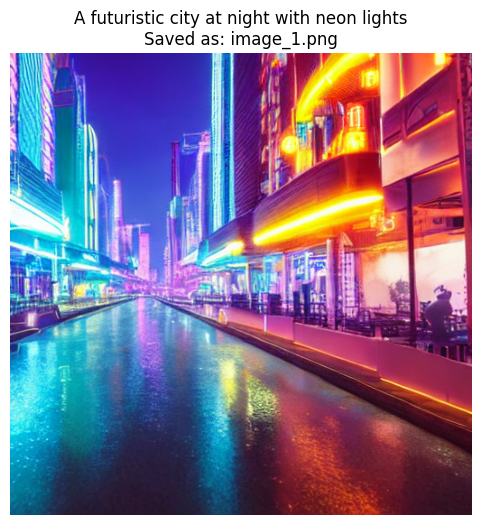

  0%|          | 0/30 [00:00<?, ?it/s]

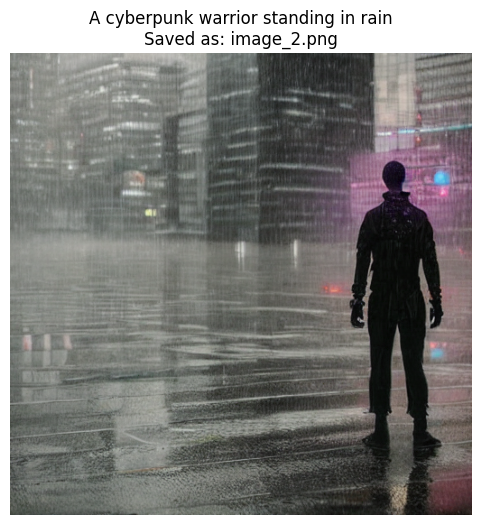

  0%|          | 0/30 [00:00<?, ?it/s]

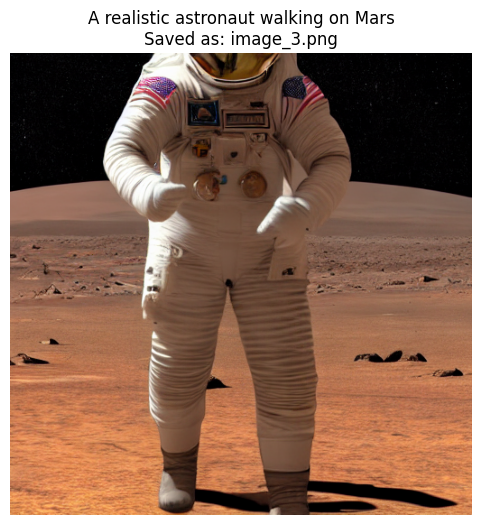

  0%|          | 0/30 [00:00<?, ?it/s]

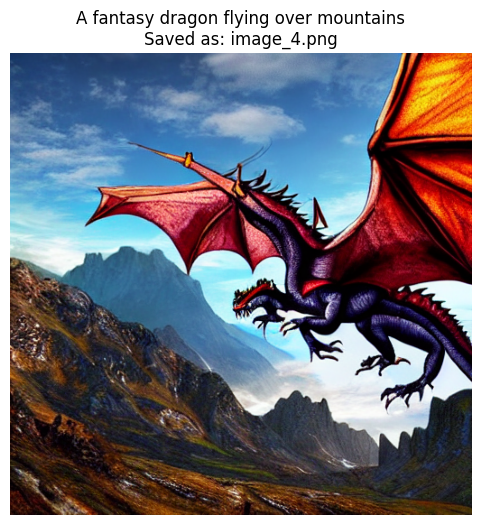

  0%|          | 0/30 [00:00<?, ?it/s]

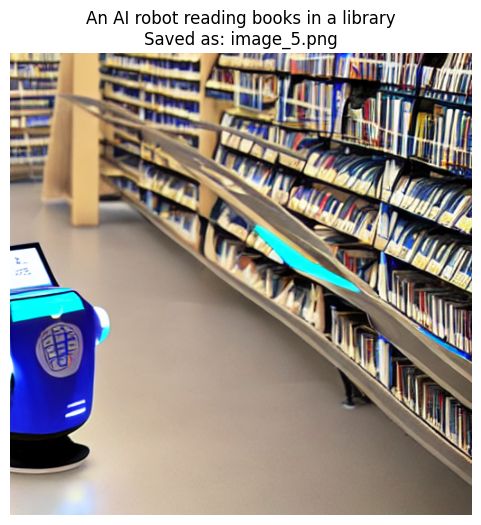

✅ Images successfully GENERATED, DISPLAYED, and SAVED!


In [1]:
# ================================
# STEP 1: Install required libraries (run once)
# ================================
!pip install diffusers transformers torch accelerate safetensors matplotlib --quiet

# ================================
# STEP 2: Imports
# ================================
from diffusers import StableDiffusionPipeline
import torch
import os
import matplotlib.pyplot as plt

# Enable inline plotting (important for notebooks)
%matplotlib inline

# ================================
# STEP 3: Device & dtype handling
# ================================
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if device == "cuda" else torch.float32

# ================================
# STEP 4: Load Stable Diffusion
# ================================
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=dtype,
    safety_checker=None  # optional: disables NSFW blocking
).to(device)

# ================================
# STEP 5: Output directory
# ================================
output_dir = "synthetic_image_dataset"
os.makedirs(output_dir, exist_ok=True)

# ================================
# STEP 6: Prompts
# ================================
prompts = [
    "A futuristic city at night with neon lights",
    "A cyberpunk warrior standing in rain",
    "A realistic astronaut walking on Mars",
    "A fantasy dragon flying over mountains",
    "An AI robot reading books in a library"
]

# ================================
# STEP 7: Generate, save & display
# ================================
for idx, prompt in enumerate(prompts):
    with torch.autocast(device):
        result = pipe(
            prompt,
            num_inference_steps=30,
            guidance_scale=7.5
        )

    image = result.images[0]

    # Save image
    image_path = os.path.join(output_dir, f"image_{idx+1}.png")
    image.save(image_path)

    # Display image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"{prompt}\nSaved as: image_{idx+1}.png")
    plt.show()

print("✅ Images successfully GENERATED, DISPLAYED, and SAVED!")
